In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as skl

In [2]:
import scipy
from sklearn.model_selection import train_test_split

In [3]:
train = pd.read_csv("data2018/BigDataSchool_train_set.csv",delimiter=",")
test = pd.read_csv("data2018/BigDataSchool_test_set.csv",delimiter=",")
features = pd.read_csv("data2018/BigDataSchool_features.csv",delimiter=",")

In [4]:
train.head()

,ID,TARGET
0,2,0.0
1,4,0.0
2,5,0.0
3,8,0.0
4,9,0.0


In [5]:
test.head()

,ID,TARGET
0,1,NaN
1,3,NaN
2,6,NaN
3,7,NaN
4,12,NaN


In [6]:
features.head()

,ID,MONTH_NUM_FROM_EVENT,F1,F2,F3,F4,F5,F6,F7,F8,...,F38,F39,F40,F41,F42,F43,F44,F45,F46,F47
0,2,1,4.0,133.0,28.0,NaN,0.0,NaN,518.98,2.60,...,89.0,137.0,0.0,2.0,2.0,1.0,0.0,0.0,2.0,958.0
1,2,2,NaN,132.0,29.0,24.0,0.0,578.35,574.98,2.80,...,141.0,93.0,NaN,2.0,3.0,1.0,0.0,0.0,2.0,936.0
2,2,3,NaN,131.0,NaN,29.0,0.0,430.13,426.32,0.93,...,128.0,114.0,1.0,3.0,3.0,1.0,0.0,0.0,1.0,919.0
3,2,4,4.0,130.0,31.0,7.0,NaN,479.33,477.13,0.00,...,3.0,137.0,0.0,3.0,3.0,1.0,0.0,0.0,3.0,618.0
4,2,5,8.0,129.0,26.0,2.0,0.0,358.12,339.03,15.28,...,2.0,NaN,0.0,4.0,4.0,2.0,NaN,0.0,2.0,NaN


In [7]:
print(features.isnull().sum()*100/103170) #% of missings. F25 does not exist! F33-34 - too much missings

ID                        0.000000
MONTH_NUM_FROM_EVENT      0.000000
F1                        3.729766
F2                        4.989823
F3                        4.914219
F4                        5.046041
F5                        4.996608
F6                        4.899680
F7                        5.141029
F8                        4.944267
F9                        4.984976
F10                       5.045071
F11                       4.979161
F12                       5.080934
F13                       5.036348
F14                       4.855094
F15                       5.006300
F16                       5.044102
F17                       5.023747
F18                       4.844432
F19                       4.924881
F20                       5.070272
F21                       4.815353
F22                       4.922943
F23                     100.000000
F24                       4.940390
F26                       4.959775
F27                       4.998546
F28                 

In [8]:
train.shape

(12890, 2)

In [9]:
test.shape

(4305, 2)

In [10]:
features.shape

(103170, 48)

In [11]:
set(train['ID']).intersection(set(features['ID'])) == set(train['ID'])

True

In [12]:
set(test['ID']).intersection(set(features['ID'])) == set(test['ID'])

True

In [13]:
train.ID.value_counts().shape

(12890,)

In [14]:
train.TARGET.value_counts()

0.0    11848
1.0     1042
Name: TARGET, dtype: int64

In [15]:
test.ID.value_counts().shape

(4305,)

In [16]:
features.MONTH_NUM_FROM_EVENT.value_counts().shape

(6,)

In [17]:
#for column in features.columns[1:]:
    #print features.column.value_counts().shape
    #print(features[column]) 
    #for i in range(1, 48):
    #namevar = "F"+str(i)
    #print(namevar + " distinct values: "+ str(features.namevar.value_counts().shape))

In [18]:
data = features.groupby(by=['ID']).mean()

In [19]:
#data.describe().to_excel("descr.xlsx") #done!

In [20]:
#data.nunique().to_excel("nuniq.xlsx") #done!

In [21]:
data.shape #as expected

(17195, 47)

In [22]:
data.head()

,MONTH_NUM_FROM_EVENT,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F38,F39,F40,F41,F42,F43,F44,F45,F46,F47
ID,,,,,,,,,,,,,,,,,,,,,
1,3.5,9.0,139.6,20.500000,0.666667,0.0,76.196667,52.563333,18.850000,99.930000,...,80.000000,145.000000,1.000000,2.333333,2.666667,1.000000,0.6,0.0,1.666667,381.600000
2,3.5,6.0,130.5,27.800000,13.000000,0.0,379.652000,396.690000,4.813333,286.723333,...,61.333333,109.200000,0.600000,3.166667,3.333333,1.333333,0.0,0.0,2.000000,822.600000
3,3.5,5.0,37.5,29.333333,4.500000,0.0,232.102500,297.790000,2.091667,712.465000,...,47.833333,111.200000,0.000000,0.000000,0.166667,0.000000,1.0,0.0,1.600000,1356.800000
4,3.5,5.0,136.5,28.750000,23.000000,0.0,576.658333,574.918000,5.080000,641.056667,...,65.800000,133.833333,1.166667,1.166667,3.166667,0.000000,2.0,0.0,1.166667,4642.400000
5,3.5,20.0,16.5,23.333333,0.000000,1.0,200.673333,67.523333,55.588000,170.705000,...,29.400000,51.600000,0.250000,0.166667,0.200000,2.000000,0.0,0.0,1.000000,169.833333


In [23]:
for val, cnt in data.F1.value_counts().iteritems():
    print ('value', val, 'was found', cnt, 'times') #-1 is special value?

value 10.0 was found 2230 times
value 4.0 was found 1537 times
value 13.0 was found 1310 times
value 15.0 was found 1010 times
value 2.0 was found 883 times
value 6.0 was found 850 times
value 22.0 was found 722 times
value 20.0 was found 706 times
value 9.0 was found 630 times
value 8.0 was found 590 times
value 17.0 was found 581 times
value 23.0 was found 573 times
value 16.0 was found 481 times
value 19.0 was found 479 times
value 14.0 was found 454 times
value 5.0 was found 430 times
value 7.0 was found 414 times
value 11.0 was found 400 times
value 25.0 was found 380 times
value 18.0 was found 380 times
value 3.0 was found 363 times
value 21.0 was found 283 times
value 24.0 was found 214 times
value 12.0 was found 114 times
value 8.666666666666666 was found 41 times
value 7.333333333333333 was found 29 times
value 12.5 was found 27 times
value 18.666666666666668 was found 27 times
value 7.5 was found 22 times
value 9.333333333333334 was found 21 times
value 6.666666666666667 was 

In [24]:
#deal with missings using average:
#columns_avg = data.mean(axis=0)

In [25]:
data = data.apply(lambda x: x.fillna(x.mean()),axis=0)

In [26]:
data = pd.merge(data, train, how='left', on=['ID']) 

In [27]:
#data["TARGET"][0] #nan

In [28]:
data["ROLE"] = "test"

In [29]:
data.loc[data['TARGET'] == 0, "ROLE"] = "train"

In [30]:
data.loc[data['TARGET'] == 1, "ROLE"] = "train"

In [31]:
#i = 0
#for item in data['TARGET']:
#    if np.isnan(item):
#        data["ROLE"][i] = "test"
#    else:
#        data["ROLE"][i] = "train"
#    i = i+1

In [32]:
datatr = data[data["ROLE"] == "train"]

In [33]:
#np.isnan(data["F23"]) #TRUE
#np.isnan(1)#FALSE
#np.isnan(np.NaN)#TRUE

In [34]:
datatr.shape

(12890, 50)

In [35]:
datate = data[data["ROLE"] == "test"]

In [36]:
datate.shape

(4305, 50)

In [37]:
datatr.head(10)

,ID,MONTH_NUM_FROM_EVENT,F1,F2,F3,F4,F5,F6,F7,F8,...,F40,F41,F42,F43,F44,F45,F46,F47,TARGET,ROLE
1,2,3.5,6.0,130.5,27.800000,13.000000,0.0,379.652000,396.690000,4.813333,...,0.600000,3.166667,3.333333,1.333333,0.0,0.0,2.000000,822.600000,0.0,train
3,4,3.5,5.0,136.5,28.750000,23.000000,0.0,576.658333,574.918000,5.080000,...,1.166667,1.166667,3.166667,0.000000,2.0,0.0,1.166667,4642.400000,0.0,train
4,5,3.5,20.0,16.5,23.333333,0.000000,1.0,200.673333,67.523333,55.588000,...,0.250000,0.166667,0.200000,2.000000,0.0,0.0,1.000000,169.833333,0.0,train
7,8,3.5,21.0,131.6,27.666667,5.833333,0.6,442.373333,416.420000,8.455000,...,1.250000,1.250000,3.750000,1.000000,0.0,0.0,1.000000,657.500000,0.0,train
8,9,3.5,20.0,6.5,30.000000,26.333333,0.0,972.756667,630.800000,340.190000,...,0.333333,2.600000,4.166667,0.000000,1.0,1.0,1.833333,36342.333333,0.0,train
9,10,3.5,17.0,17.0,26.833333,0.000000,0.0,181.643333,180.406667,0.858333,...,0.333333,1.000000,3.666667,2.000000,0.0,0.0,1.000000,211.333333,0.0,train
10,11,3.5,4.0,120.5,28.666667,0.000000,0.0,262.760000,262.561667,0.898333,...,0.000000,0.166667,0.166667,1.000000,0.0,0.0,1.000000,555.333333,0.0,train
12,13,3.5,5.0,6.0,29.000000,30.333333,0.0,940.075000,903.673333,35.181667,...,3.333333,3.833333,4.400000,1.000000,0.0,0.0,1.000000,2974.333333,0.0,train
13,14,3.5,4.0,83.5,28.000000,0.000000,0.0,476.875000,408.890000,6.432000,...,0.000000,1.500000,4.750000,2.000000,0.0,0.0,1.000000,181.250000,0.0,train
14,15,3.5,20.0,61.5,30.333333,0.000000,0.0,521.170000,510.714000,6.076000,...,0.333333,0.333333,1.666667,0.000000,2.0,0.0,1.000000,473.333333,0.0,train


In [38]:
Y=datatr['TARGET']
X=datatr.drop(datatr.columns[[0,1,24,33,34,48,49]], axis=1)

In [39]:
X.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F38,F39,F40,F41,F42,F43,F44,F45,F46,F47
1,6.0,130.5,27.800000,13.000000,0.0,379.652000,396.690000,4.813333,286.723333,282.138333,...,61.333333,109.200000,0.600000,3.166667,3.333333,1.333333,0.0,0.0,2.000000,822.600000
3,5.0,136.5,28.750000,23.000000,0.0,576.658333,574.918000,5.080000,641.056667,623.885000,...,65.800000,133.833333,1.166667,1.166667,3.166667,0.000000,2.0,0.0,1.166667,4642.400000
4,20.0,16.5,23.333333,0.000000,1.0,200.673333,67.523333,55.588000,170.705000,90.214000,...,29.400000,51.600000,0.250000,0.166667,0.200000,2.000000,0.0,0.0,1.000000,169.833333
7,21.0,131.6,27.666667,5.833333,0.6,442.373333,416.420000,8.455000,587.766667,496.163333,...,15.666667,121.500000,1.250000,1.250000,3.750000,1.000000,0.0,0.0,1.000000,657.500000
8,20.0,6.5,30.000000,26.333333,0.0,972.756667,630.800000,340.190000,450.356000,350.525000,...,191.666667,142.000000,0.333333,2.600000,4.166667,0.000000,1.0,1.0,1.833333,36342.333333


In [40]:
print(X.isnull().sum()*100/103170)

F1     0.0
F2     0.0
F3     0.0
F4     0.0
F5     0.0
F6     0.0
F7     0.0
F8     0.0
F9     0.0
F10    0.0
F11    0.0
F12    0.0
F13    0.0
F14    0.0
F15    0.0
F16    0.0
F17    0.0
F18    0.0
F19    0.0
F20    0.0
F21    0.0
F22    0.0
F24    0.0
F26    0.0
F27    0.0
F28    0.0
F29    0.0
F30    0.0
F31    0.0
F32    0.0
F35    0.0
F36    0.0
F37    0.0
F38    0.0
F39    0.0
F40    0.0
F41    0.0
F42    0.0
F43    0.0
F44    0.0
F45    0.0
F46    0.0
F47    0.0
dtype: float64


In [41]:
# split datatr into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [42]:
X.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F38,F39,F40,F41,F42,F43,F44,F45,F46,F47
count,12890.000000,12890.000000,12890.000000,12890.000000,12890.000000,12890.000000,12890.000000,12890.000000,12890.000000,12890.000000,...,12890.000000,12890.000000,12890.000000,12890.000000,12890.000000,12890.000000,12890.000000,12890.000000,12890.000000,12890.000000
mean,12.090949,72.834646,21.152852,7.098660,0.037755,414.238269,398.841572,10.696151,397.883633,379.302292,...,44.941661,102.546259,0.892252,1.668682,2.417325,0.726834,0.652565,0.067811,1.281760,1681.708036
std,6.452595,49.353028,10.350869,10.167246,0.142513,510.993880,502.641965,27.840751,427.554814,418.684976,...,71.339237,32.073705,0.995039,1.455843,1.774157,0.760498,0.629644,0.228572,0.469386,3227.857433
min,-1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,7.000000,30.500000,14.333333,0.000000,0.000000,54.366250,46.009250,0.323500,103.910417,91.643333,...,22.000000,88.500000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,1.000000,304.000000
50%,11.000000,55.300000,26.166667,0.833333,0.000000,248.807500,232.517500,2.384167,285.485000,265.812500,...,40.500000,105.333333,0.600000,1.500000,2.200000,0.733436,0.645617,0.000000,1.166667,685.716667
75%,17.000000,120.500000,29.600000,12.200000,0.000000,581.932500,562.376250,9.220000,553.662083,529.508333,...,58.333333,123.166667,1.333333,2.400000,3.500000,1.000000,1.000000,0.000000,1.333333,1661.656808
max,25.000000,200.500000,30.800000,31.000000,1.000000,6155.760000,6153.766667,690.875000,6721.691667,6716.473333,...,7303.333333,193.333333,7.800000,9.333333,10.200000,5.000000,2.000000,1.000000,12.400000,90050.000000


In [43]:
#for val, cnt in X.F33.value_counts().iteritems():
    #print ('value', val, 'was found', cnt, 'times')

In [44]:
#df = pd.DataFrame({'mycolumn': [1,2,2,2,3,3,4]})
#for val, cnt in df.mycolumn.value_counts().iteritems():
   # print 'value', val, 'was found', cnt, 'times'

In [45]:
"""def plot_corr(df,size=10):
    '''Plot a graphical correlation matrix for a dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''
    
   # %matplotlib inline
   # import matplotlib.pyplot as plt

    # Compute the correlation matrix for the received dataframe
    corr = df.corr()
    
    # Plot the correlation matrix
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='RdYlGn')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
    # Add the colorbar legend
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)"""

"def plot_corr(df,size=10):\n    '''Plot a graphical correlation matrix for a dataframe.\n\n    Input:\n        df: pandas DataFrame\n        size: vertical and horizontal size of the plot'''\n    \n   # %matplotlib inline\n   # import matplotlib.pyplot as plt\n\n    # Compute the correlation matrix for the received dataframe\n    corr = df.corr()\n    \n    # Plot the correlation matrix\n    fig, ax = plt.subplots(figsize=(size, size))\n    cax = ax.matshow(corr, cmap='RdYlGn')\n    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);\n    plt.yticks(range(len(corr.columns)), corr.columns);\n    \n    # Add the colorbar legend\n    cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)"

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
predictions_prob = logisticRegr.predict_proba(X_test)
predictions_prob = predictions_prob[:,1]
score = logisticRegr.score(X_test, y_test)
print(score)
from sklearn.metrics import roc_auc_score


0.9113007499353504


In [50]:
roc_auc_score(y_test, predictions_prob)


0.7670403015414496

In [52]:
pred_train = logisticRegr.predict_proba(X_train)
pred_train = pred_train[:,1]
roc_auc_score(y_train, pred_train)


0.7471483944608703

In [53]:
predictions.sum()

8.0

In [54]:
len(predictions_prob)

3867

In [55]:
len(predictions)

3867

In [56]:
len(y_test)

3867

In [57]:
predictions[predictions>0]

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [58]:
#REPEAT REGRESSION - choose variables

In [59]:
""""
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
""""

SyntaxError: EOL while scanning string literal (<ipython-input-59-4bbf05f99fb3>, line 12)

In [60]:
from sklearn.feature_selection import RFE

In [61]:
logisticRegFinal = LogisticRegression()

In [62]:
rfe = RFE(logisticRegFinal, 20)

In [63]:
rfe = rfe.fit(X_train, y_train)

In [64]:
print(rfe.support_)
print(rfe.ranking_)

[False  True  True False  True False False False False False False False
 False False False False False  True  True False False False  True  True
  True  True  True  True  True False False False  True False False  True
  True  True  True  True  True  True False]
[ 4  1  1  6  1 16 17 15 14 13 24  2  3  7 10 11  9  1  1  8 21 22  1  1
  1  1  1  1  1  5 18 12  1 20 19  1  1  1  1  1  1  1 23]


In [65]:
col_drop = [0,3,5,6,7,8,9,10,11,12,13,14,15,16,19,20,21,29,30,31,33,34,42]

In [66]:
X_train2 = X_train.drop(X_train.columns[col_drop], axis=1)
X_test2 = X_test.drop(X_test.columns[col_drop], axis=1)

In [67]:
X_train2.shape

(9023, 20)

In [68]:
X_train2.head()

,F2,F3,F5,F18,F19,F24,F26,F27,F28,F29,F30,F31,F37,F40,F41,F42,F43,F44,F45,F46
16348,120.5,29.666667,0.0,1.095000,0.0,0.0,0.0,30.000000,30.200000,30.666667,0.000000,0.000000,2.0,0.000000,0.166667,0.500000,2.0,0.0,0.0,1.000000
1565,41.0,23.000000,0.0,30.916667,5.5,0.0,0.0,2.833333,17.166667,24.200000,0.400000,0.000000,3.6,0.400000,2.000000,3.250000,0.4,0.6,0.0,1.200000
14588,38.5,24.333333,0.0,3.906667,4.8,0.0,22.6,28.833333,28.750000,29.333333,0.000000,0.000000,2.0,1.000000,2.833333,3.000000,2.0,0.0,0.0,1.333333
14714,42.5,0.333333,0.0,0.000000,0.0,0.0,0.0,30.600000,30.666667,30.666667,0.000000,0.000000,1.0,1.000000,1.166667,3.166667,2.0,0.0,0.0,1.000000
12837,142.5,30.666667,0.0,74.541667,0.5,0.0,0.0,3.500000,3.500000,5.666667,10.333333,1.666667,3.5,0.166667,0.500000,1.166667,0.0,1.0,1.0,1.000000


In [69]:
#X_train2.corr().to_csv("corr.csv") #Done!

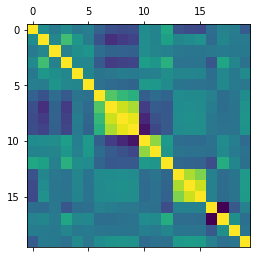

In [70]:
plt.matshow(X_train2.corr())

In [71]:
logisticRegFinal.fit(X_train2, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
#predictions = logisticRegFinal.predict(X_test2)
predictions_prob = logisticRegFinal.predict_proba(X_test2)
predictions_prob = predictions_prob[:,1]
score = logisticRegFinal.score(X_test2, y_test)
print(score)
roc_auc_score(y_test, predictions_prob)

0.9110421515386604


0.7698771284431605

In [74]:
pred_train2 = logisticRegFinal.predict_proba(X_train2)
pred_train2 = pred_train2[:,1]
roc_auc_score(y_train, pred_train2)

0.7425692141365607

In [75]:
X_train2.head()

,F2,F3,F5,F18,F19,F24,F26,F27,F28,F29,F30,F31,F37,F40,F41,F42,F43,F44,F45,F46
16348,120.5,29.666667,0.0,1.095000,0.0,0.0,0.0,30.000000,30.200000,30.666667,0.000000,0.000000,2.0,0.000000,0.166667,0.500000,2.0,0.0,0.0,1.000000
1565,41.0,23.000000,0.0,30.916667,5.5,0.0,0.0,2.833333,17.166667,24.200000,0.400000,0.000000,3.6,0.400000,2.000000,3.250000,0.4,0.6,0.0,1.200000
14588,38.5,24.333333,0.0,3.906667,4.8,0.0,22.6,28.833333,28.750000,29.333333,0.000000,0.000000,2.0,1.000000,2.833333,3.000000,2.0,0.0,0.0,1.333333
14714,42.5,0.333333,0.0,0.000000,0.0,0.0,0.0,30.600000,30.666667,30.666667,0.000000,0.000000,1.0,1.000000,1.166667,3.166667,2.0,0.0,0.0,1.000000
12837,142.5,30.666667,0.0,74.541667,0.5,0.0,0.0,3.500000,3.500000,5.666667,10.333333,1.666667,3.5,0.166667,0.500000,1.166667,0.0,1.0,1.0,1.000000


In [76]:
#delete correlated variables F28, F41, F27, F30, F40, F43
#27 28 30 40 41 43
col_drop2 = [7,8,10,13,14,16]

In [77]:
X_train3 = X_train2.drop(X_train2.columns[col_drop2], axis=1)
X_test3 = X_test2.drop(X_test2.columns[col_drop2], axis=1)

In [78]:
X_train3.head()

,F2,F3,F5,F18,F19,F24,F26,F29,F31,F37,F42,F44,F45,F46
16348,120.5,29.666667,0.0,1.095000,0.0,0.0,0.0,30.666667,0.000000,2.0,0.500000,0.0,0.0,1.000000
1565,41.0,23.000000,0.0,30.916667,5.5,0.0,0.0,24.200000,0.000000,3.6,3.250000,0.6,0.0,1.200000
14588,38.5,24.333333,0.0,3.906667,4.8,0.0,22.6,29.333333,0.000000,2.0,3.000000,0.0,0.0,1.333333
14714,42.5,0.333333,0.0,0.000000,0.0,0.0,0.0,30.666667,0.000000,1.0,3.166667,0.0,0.0,1.000000
12837,142.5,30.666667,0.0,74.541667,0.5,0.0,0.0,5.666667,1.666667,3.5,1.166667,1.0,1.0,1.000000


In [79]:
logisticRegFinal.fit(X_train3, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [80]:
#predictions = logisticRegFinal.predict(X_test2)
predictions_prob = logisticRegFinal.predict_proba(X_test3)
predictions_prob = predictions_prob[:,1]
score = logisticRegFinal.score(X_test3, y_test)
print(score)
roc_auc_score(y_test, predictions_prob)

0.9110421515386604


0.7607543474145949

In [81]:
pred_train3 = logisticRegFinal.predict_proba(X_train3)
pred_train3 = pred_train3[:,1]
roc_auc_score(y_train, pred_train3)

0.7372404502188613

In [476]:
#create final file

In [477]:
#X_test_final = data...

In [478]:
#predictions_final = logisticRegr.predict(X_test_final)

In [479]:
# test["Target"]  = predictions_final_prob

In [480]:
#to txt with , separator

In [481]:
"""predictions = logisticRegFinal.predict(X_test)
predictions_prob = logisticRegFinal.predict_proba(X_test)
predictions_prob = predictions_prob[:,1]
score = logisticRegr.score(X_test, y_test)
print(score)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predictions_prob)"""

'predictions = logisticRegFinal.predict(X_test)\npredictions_prob = logisticRegFinal.predict_proba(X_test)\npredictions_prob = predictions_prob[:,1]\nscore = logisticRegr.score(X_test, y_test)\nprint(score)\nfrom sklearn.metrics import roc_auc_score\nroc_auc_score(y_test, predictions_prob)'

In [82]:
datate.head()

,ID,MONTH_NUM_FROM_EVENT,F1,F2,F3,F4,F5,F6,F7,F8,...,F40,F41,F42,F43,F44,F45,F46,F47,TARGET,ROLE
0,1,3.5,9.0,139.6,20.500000,0.666667,0.000000,76.196667,52.563333,18.850000,...,1.0,2.333333,2.666667,1.0,0.6,0.0,1.666667,381.600000,NaN,test
2,3,3.5,5.0,37.5,29.333333,4.500000,0.000000,232.102500,297.790000,2.091667,...,0.0,0.000000,0.166667,0.0,1.0,0.0,1.600000,1356.800000,NaN,test
5,6,3.5,10.0,115.4,30.000000,0.250000,0.000000,770.958333,770.856667,0.046000,...,0.0,0.500000,2.500000,1.0,0.0,0.0,1.000000,286.833333,NaN,test
6,7,3.5,13.0,136.5,9.000000,1.666667,0.000000,6.800000,5.990000,0.320000,...,0.2,0.600000,3.000000,0.0,0.0,0.0,1.333333,193.833333,NaN,test
11,12,3.5,8.0,11.5,18.500000,0.000000,0.833333,325.658333,39.080000,2.526000,...,1.2,1.400000,1.666667,1.0,0.0,0.0,1.000000,367.200000,NaN,test


In [83]:
X_test_final = datate.drop(datate.columns[[0,1,24,33,34,48,49]], axis=1)
X_test_final = X_test_final.drop(X_test_final.columns[col_drop], axis=1)
X_test_final = X_test_final.drop(X_test_final.columns[col_drop2], axis=1)

In [84]:
X_test_final.head()

,F2,F3,F5,F18,F19,F24,F26,F29,F31,F37,F42,F44,F45,F46
0,139.6,20.500000,0.000000,8.0,2.200000,0.000000,10.5,27.666667,0.000000,10.333333,2.666667,0.6,0.0,1.666667
2,37.5,29.333333,0.000000,9.0,0.333333,0.000000,0.0,26.666667,0.000000,4.833333,0.166667,1.0,0.0,1.600000
5,115.4,30.000000,0.000000,30.0,0.000000,0.000000,0.0,29.333333,0.000000,5.833333,2.500000,0.0,0.0,1.000000
6,136.5,9.000000,0.000000,0.0,0.000000,0.000000,0.0,30.500000,0.000000,3.800000,3.000000,0.0,0.0,1.333333
11,11.5,18.500000,0.833333,0.0,0.000000,0.166667,0.0,8.500000,6.166667,1.400000,1.666667,0.0,0.0,1.000000


In [85]:
predictions_final_prob = logisticRegFinal.predict_proba(X_test_final)
predictions_final_prob = predictions_final_prob[:,1]

In [86]:
len(test["TARGET"] )

4305

In [87]:
len(X_test_final)

4305

In [88]:
test["TARGET"]  = np.round(predictions_final_prob,6)

In [89]:
test.head()

,ID,TARGET
0,1,0.037827
1,3,0.058306
2,6,0.034273
3,7,0.055257
4,12,0.074206


In [394]:
test.describe()

,ID,TARGET
count,4305.000000,4305.000000
mean,10234.606736,0.077802
std,5500.160235,0.070577
min,1.000000,0.001404
25%,5761.000000,0.029492
50%,10372.000000,0.058858
75%,14917.000000,0.105553
max,19680.000000,1.000000


In [397]:
test.to_csv("LiubashenkoDaryna_test.txt",index=False)